In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray
import cv2
import random

In [6]:
COLOR_FOREGROUND = 255
COLOR_BACKGROUND = 0

def showimg(_img, _title="Obraz"):
    print(_img.shape, _img.dtype)
    plt.imshow(_img, cmap="gray")
    plt.axis('off')
    plt.suptitle(_title)
    plt.show()

(344, 549) uint8


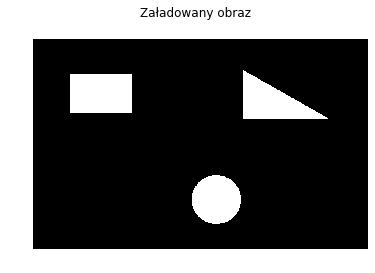

In [7]:
img = io.imread("./pattern1.png")
th = 128
img = img_as_ubyte(rgb2gray(img))
th, bim = cv2.threshold(img, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)
showimg(bim, _title="Załadowany obraz")

10
(344, 549, 3) uint8


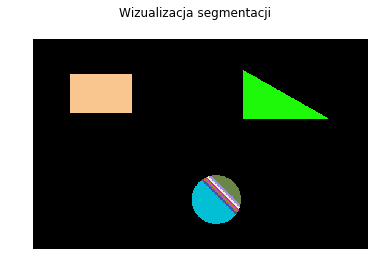

In [8]:
def visualize(segment_table):
    max_segment_no = 0
    for i in range(segment_table.shape[0]):
        for j in range(segment_table.shape[1]):
            if(segment_table[i][j] > max_segment_no):
                max_segment_no = segment_table[i][j]
    
    vimg = np.zeros([segment_table.shape[0], segment_table.shape[1], 3], dtype=np.uint8)
    segment_colors = [None] * (max_segment_no + 1)
    segment_colors[0] = (0,0,0)
    for i in range(1, max_segment_no + 1):
        segment_colors[i] = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    
    for x in range(vimg.shape[0]):
        for y in range(vimg.shape[1]):
            for z in range(vimg.shape[2]):
                vimg[x][y][z] = segment_colors[segment_table[x][y]][z]
    return vimg

def get_neighbouring(im, segment_table, px=0, py=0):
    if segment_table[px-1][py-1] != 0:      # top left
        return segment_table[px-1][py-1]
    elif segment_table[px-1][py] != 0 :     # top center
        return segment_table[px-1][py]
    elif segment_table[px-1][py + 1] != 0:  # top right
        return segment_table[px-1][py+1]
    elif segment_table[px][py+1] != 0 :     # middle right
        return segment_table[px][py+1]
    elif segment_table[px+1][py+1] != 0:    # bottom right
        return segment_table[px+1][py+1]
    elif segment_table[px+1][py] != 0 :     # bottom center
        return segment_table[px+1][py]
    elif segment_table[px+1][py-1] != 0:    # bottom left
        return segment_table[px+1][py-1]
    elif segment_table[px][py-1] != 0 :     # middle left
        return segment_table[px][py-1]
    else:
        return 0

def segment_by_region_growing(im):
    object_num = 1
    segment_table = np.zeros(im.shape, dtype=np.uint32)
    global COLOR_FOREGROUND, COLOR_BACKGROUND
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] == COLOR_FOREGROUND:
                first_neighbour = get_neighbouring(im, segment_table, px=i, py=j)
                if first_neighbour != 0:
                    segment_table[i][j] = first_neighbour
                else:
                    segment_table[i][j] = object_num
                    object_num += 1
            else:
                continue
    return ((object_num - 1), segment_table)

objects, table = segment_by_region_growing(bim)
print(objects)

showimg(visualize(table), _title="Wizualizacja segmentacji")